In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df1 = pd.DataFrame(np.random.randn(10,3),columns=['col1','col2','col3'])
df2 = pd.DataFrame(np.random.randn(7,3),columns=['col1','col2','col3'])

print(df2)
df2 = df2.reindex_like(df1,method='ffill',limit=2)
print(df2)

       col1      col2      col3
0 -0.146354  2.209028  1.543068
1  0.041889  0.514845  0.554627
2  0.113595  1.453533  0.137563
3  0.165877  1.076105  1.327230
4 -0.568550 -1.947517  0.687498
5  0.803073  0.843882  0.652683
6 -1.627907 -0.611733 -1.911047
       col1      col2      col3
0 -0.146354  2.209028  1.543068
1  0.041889  0.514845  0.554627
2  0.113595  1.453533  0.137563
3  0.165877  1.076105  1.327230
4 -0.568550 -1.947517  0.687498
5  0.803073  0.843882  0.652683
6 -1.627907 -0.611733 -1.911047
7 -1.627907 -0.611733 -1.911047
8 -1.627907 -0.611733 -1.911047
9       NaN       NaN       NaN


In [8]:
df1

,col1,col2,col3
0,-1.032013,-0.504512,1.547106
1,-0.528966,-0.502538,1.173684
2,0.982337,-0.397521,2.582115
3,0.451221,-0.123143,1.625881
4,-0.788249,0.840857,-0.454629
5,0.114746,0.734134,1.046586
6,-0.523540,-0.658471,0.304374
7,-0.255146,0.559552,-1.204008
8,0.685940,0.712511,0.571279
9,-0.441161,-0.869556,0.700732


In [12]:
df1.rename(index={0:'Row1',4:'Row4',9:'Row9'},columns={'col1':1,'col3':3})

,1,col2,3
Row1,-1.032013,-0.504512,1.547106
1,-0.528966,-0.502538,1.173684
2,0.982337,-0.397521,2.582115
3,0.451221,-0.123143,1.625881
Row4,-0.788249,0.840857,-0.454629
5,0.114746,0.734134,1.046586
6,-0.523540,-0.658471,0.304374
7,-0.255146,0.559552,-1.204008
8,0.685940,0.712511,0.571279
Row9,-0.441161,-0.869556,0.700732


In [2]:
Data = pd.read_excel('WQ1.xlsx',sheet_name='Nov 04')

In [19]:
Data.head()

,St. No,Depth,S.D,W.T,Salinity,Turbidity,DO,pH,TSM,NH4-N,NO2-N,NO3-N,PO4-P,SiO2-Si,TN,TP
0,1,0.50,0.5,28.4,16.1,1.48,7.40,9.01,11.00,8.0597,0.11310,0.39966,0.07112,20.57904,43.2761,0.44001
1,2,2.25,1.0,26.6,15.9,2.80,6.58,8.45,10.80,9.3527,0.02262,0.35693,0.07112,20.22192,24.2018,0.73335
2,3,2.75,1.0,26.6,16.1,3.03,8.22,8.55,12.80,4.9996,0.02262,0.44239,0.08128,19.64160,20.9202,0.68446
3,4,2.20,2.2,26.6,16.5,1.32,8.30,8.72,5.90,0.1293,0.09048,0.39966,0.07112,19.77552,20.9202,0.73335
4,5,1.80,1.8,26.4,15.9,1.04,8.70,8.58,7.72,0.2586,0.09048,0.44239,0.07112,19.37376,30.9701,0.58668


In [15]:
Data.columns

Index(['St. No', 'Depth', 'S.D', 'W.T', 'Salinity', 'Turbidity', 'DO', 'pH',
       'TSM', 'NH4-N', 'NO2-N', 'NO3-N', 'PO4-P', 'SiO2-Si', 'TN', 'TP'],
      dtype='object')

In [16]:
Data.index

RangeIndex(start=0, stop=36, step=1)

In [3]:
xls = pd.ExcelFile('WQ1.xlsx')

In [28]:
len(xls.sheet_names)

29

In [4]:
Data = pd.DataFrame()
for sheet in xls.sheet_names:
    temp = pd.read_excel('WQ1.xlsx',sheet_name=sheet)
    Data = pd.concat([Data, temp])

In [31]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 35
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   St. No     1044 non-null   int64  
 1   Depth      1034 non-null   float64
 2   S.D        1033 non-null   float64
 3   W.T        1035 non-null   float64
 4   Salinity   1035 non-null   float64
 5   Turbidity  1030 non-null   float64
 6   DO         1035 non-null   float64
 7   pH         1036 non-null   float64
 8   TSM        1026 non-null   float64
 9   NH4-N      1026 non-null   float64
 10  NO2-N      1036 non-null   float64
 11  NO3-N      1031 non-null   float64
 12  PO4-P      1035 non-null   float64
 13  SiO2-Si    1033 non-null   float64
 14  TN         1027 non-null   float64
 15  TP         1012 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 138.7 KB


In [32]:
Data.describe()

,St. No,Depth,S.D,W.T,Salinity,Turbidity,DO,pH,TSM,NH4-N,NO2-N,NO3-N,PO4-P,SiO2-Si,TN,TP
count,1044.000000,1034.000000,1033.000000,1035.000000,1035.000000,1030.000000,1035.000000,1036.000000,1026.000000,1026.000000,1036.000000,1031.000000,1035.000000,1033.000000,1027.000000,1012.000000
mean,18.500000,1.742621,0.576462,29.256531,12.163740,54.999029,7.159511,8.304210,75.191285,2.960870,0.273333,2.292057,0.327828,41.252782,29.351678,0.857775
std,10.393274,0.792122,0.532560,2.734294,9.174874,113.721950,1.700331,0.417211,148.795049,2.705394,0.392468,3.595086,0.671334,30.656762,17.398524,1.342963
min,1.000000,0.100000,0.000000,20.100000,0.000000,0.040000,1.110000,6.760000,0.800000,0.000000,0.000000,0.000000,0.000000,0.370320,1.000000,0.070560
25%,9.750000,1.250000,0.150000,27.850000,4.405000,5.017500,6.350000,8.060000,19.200000,1.025600,0.072720,0.399960,0.079200,17.364600,17.941580,0.307655
50%,18.500000,1.750000,0.500000,29.500000,11.130000,14.000000,7.000000,8.255000,32.550000,2.202520,0.152705,0.854230,0.145620,35.262100,25.113000,0.481710
75%,27.250000,2.250000,1.000000,31.300000,19.100000,49.925000,7.970000,8.500000,69.382500,4.035200,0.315750,2.216085,0.302990,55.777600,37.609045,0.844900
max,36.000000,4.500000,3.750000,37.800000,35.300000,996.000000,15.950000,10.050000,2656.000000,22.117140,5.748160,22.791220,9.300000,194.039500,138.779640,17.400000


In [37]:
SubData = Data[['W.T','Salinity','DO']]

In [38]:
SubData.head()

,W.T,Salinity,DO
0,29.5,10.0,8.37
1,30.0,10.4,6.90
2,29.6,11.8,6.79
3,29.6,10.7,5.17
4,29.3,11.7,6.46


In [39]:
del SubData

In [42]:
SubData = Data.iloc[0:10,3:5]

In [43]:
SubData

,W.T,Salinity
0,29.5,10.0
1,30.0,10.4
2,29.6,11.8
3,29.6,10.7
4,29.3,11.7
5,30.1,12.6
6,29.8,13.9
7,31.2,13.4
8,NaN,NaN
9,30.1,15.1


In [5]:
TempData = Data.iloc[1:20,[2,4,6,10]]

In [54]:
TempData

,S.D,Salinity,DO,NO2-N
1,0.50,10.4,6.90,0.39
2,0.50,11.8,6.79,0.30
3,NaN,10.7,5.17,0.21
4,1.50,11.7,6.46,0.41
5,1.00,12.6,6.18,0.41
6,0.75,13.9,6.98,0.35
7,0.25,13.4,7.12,0.46
8,NaN,NaN,NaN,NaN
9,0.50,15.1,6.54,0.63
10,0.75,14.8,8.36,0.40


In [6]:
TempData.iloc[8] = pd.Series([np.nan, np.nan, np.nan, np.nan])

In [7]:
TempData.interpolate(method='nearest',inplace=True)

In [81]:
TempData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 1 to 19
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   S.D       19 non-null     float64
 1   Salinity  19 non-null     float64
 2   DO        19 non-null     float64
 3   NO2-N     19 non-null     float64
dtypes: float64(4)
memory usage: 760.0 bytes


array([<Axes: ylabel='S.D'>, <Axes: ylabel='Salinity'>,
       <Axes: ylabel='DO'>, <Axes: ylabel='NO2-N'>], dtype=object)

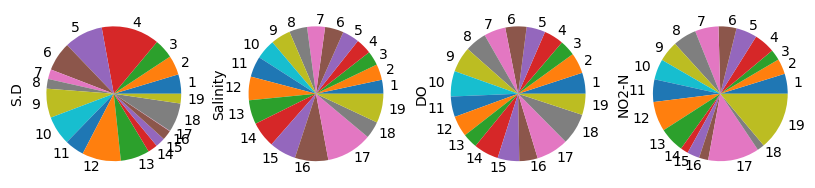

In [32]:
import matplotlib.pyplot as plt
TempData.plot.pie(subplots=True,legend=False,figsize=(10,8))

C:\Users\BSRVPrasad\AppData\Local\Temp\ipykernel_21824\1870093961.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  TempData.plot(ax=axs,subplots=True,legend=False)


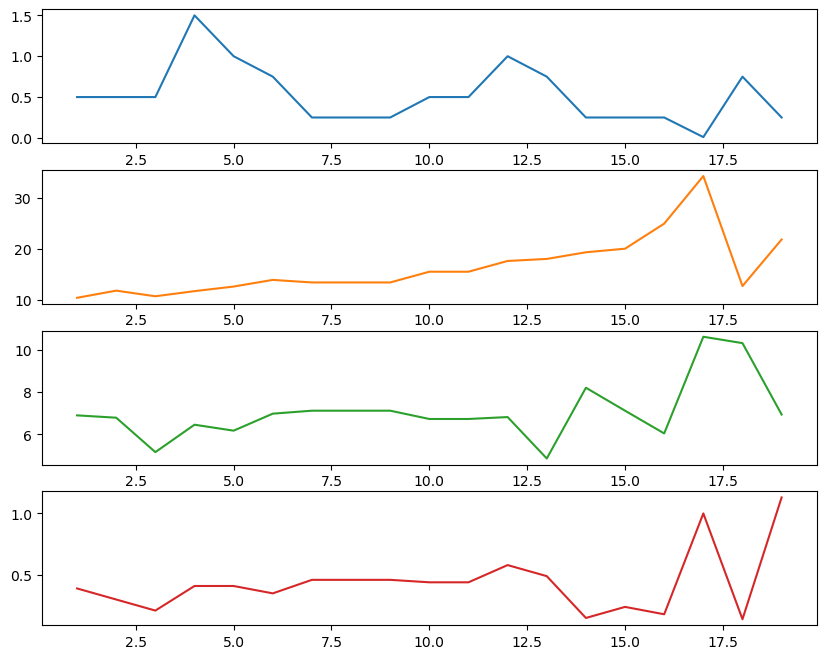

In [96]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(figsize=(10,8))
TempData.plot(ax=axs,subplots=True,legend=False)
axs.set_xlabel('Data')
axs.set_ylabel('Y-Data')
axs.set_title('Plot')
plt.show()

In [97]:
[method_name for method_name in dir(TempData.plot) \
 if not method_name.startswith("_")]

['area',
 'bar',
 'barh',
 'box',
 'density',
 'hexbin',
 'hist',
 'kde',
 'line',
 'pie',
 'scatter']

<AxesSubplot: ylabel='Density'>

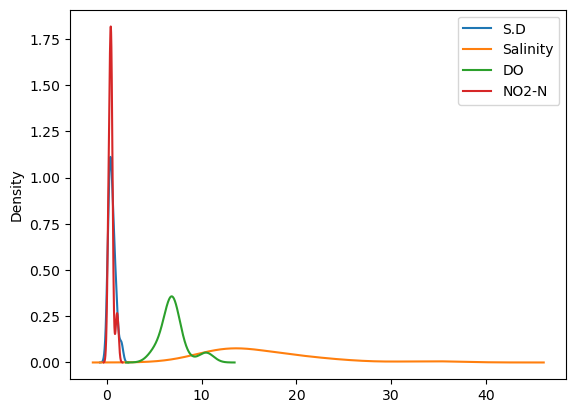

In [105]:
TempData.plot.kde()

<AxesSubplot: >

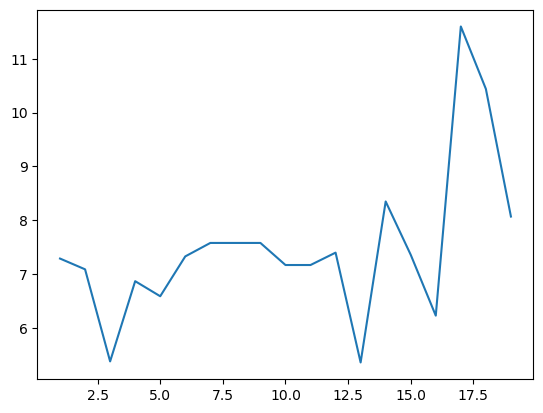

In [108]:
(TempData['DO'] + TempData['NO2-N']).plot()

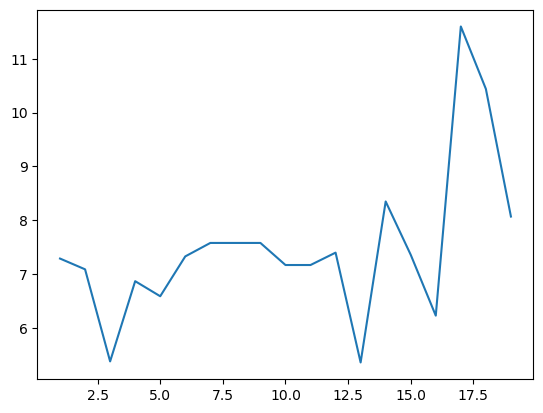

In [107]:
plt.plot(x)

In [110]:
for col in TempData:
   print(TempData[col])

1     0.50
2     0.50
3     0.50
4     1.50
5     1.00
6     0.75
7     0.25
8     0.25
9     0.25
10    0.50
11    0.50
12    1.00
13    0.75
14    0.25
15    0.25
16    0.25
17    0.01
18    0.75
19    0.25
Name: S.D, dtype: float64
1     10.4
2     11.8
3     10.7
4     11.7
5     12.6
6     13.9
7     13.4
8     13.4
9     13.4
10    15.5
11    15.5
12    17.6
13    18.0
14    19.3
15    20.0
16    24.9
17    34.2
18    12.7
19    21.8
Name: Salinity, dtype: float64
1      6.90
2      6.79
3      5.17
4      6.46
5      6.18
6      6.98
7      7.12
8      7.12
9      7.12
10     6.73
11     6.73
12     6.82
13     4.87
14     8.20
15     7.12
16     6.05
17    10.60
18    10.30
19     6.94
Name: DO, dtype: float64
1     0.39
2     0.30
3     0.21
4     0.41
5     0.41
6     0.35
7     0.46
8     0.46
9     0.46
10    0.44
11    0.44
12    0.58
13    0.49
14    0.15
15    0.24
16    0.18
17    1.00
18    0.14
19    1.13
Name: NO2-N, dtype: float64


In [111]:
for key,value in TempData.iteritems():
   print(key,value)

S.D 1     0.50
2     0.50
3     0.50
4     1.50
5     1.00
6     0.75
7     0.25
8     0.25
9     0.25
10    0.50
11    0.50
12    1.00
13    0.75
14    0.25
15    0.25
16    0.25
17    0.01
18    0.75
19    0.25
Name: S.D, dtype: float64
Salinity 1     10.4
2     11.8
3     10.7
4     11.7
5     12.6
6     13.9
7     13.4
8     13.4
9     13.4
10    15.5
11    15.5
12    17.6
13    18.0
14    19.3
15    20.0
16    24.9
17    34.2
18    12.7
19    21.8
Name: Salinity, dtype: float64
DO 1      6.90
2      6.79
3      5.17
4      6.46
5      6.18
6      6.98
7      7.12
8      7.12
9      7.12
10     6.73
11     6.73
12     6.82
13     4.87
14     8.20
15     7.12
16     6.05
17    10.60
18    10.30
19     6.94
Name: DO, dtype: float64
NO2-N 1     0.39
2     0.30
3     0.21
4     0.41
5     0.41
6     0.35
7     0.46
8     0.46
9     0.46
10    0.44
11    0.44
12    0.58
13    0.49
14    0.15
15    0.24
16    0.18
17    1.00
18    0.14
19    1.13
Name: NO2-N, dtype: float64


In [112]:
for row_index,row in TempData.iterrows():
   print(row_index,row)

1 S.D          0.50
Salinity    10.40
DO           6.90
NO2-N        0.39
Name: 1, dtype: float64
2 S.D          0.50
Salinity    11.80
DO           6.79
NO2-N        0.30
Name: 2, dtype: float64
3 S.D          0.50
Salinity    10.70
DO           5.17
NO2-N        0.21
Name: 3, dtype: float64
4 S.D          1.50
Salinity    11.70
DO           6.46
NO2-N        0.41
Name: 4, dtype: float64
5 S.D          1.00
Salinity    12.60
DO           6.18
NO2-N        0.41
Name: 5, dtype: float64
6 S.D          0.75
Salinity    13.90
DO           6.98
NO2-N        0.35
Name: 6, dtype: float64
7 S.D          0.25
Salinity    13.40
DO           7.12
NO2-N        0.46
Name: 7, dtype: float64
8 S.D          0.25
Salinity    13.40
DO           7.12
NO2-N        0.46
Name: 8, dtype: float64
9 S.D          0.25
Salinity    13.40
DO           7.12
NO2-N        0.46
Name: 9, dtype: float64
10 S.D          0.50
Salinity    15.50
DO           6.73
NO2-N        0.44
Name: 10, dtype: float64
11 S.D          0.

In [113]:
for row in TempData.itertuples():
    print(row)

Pandas(Index=1, _1=0.5, Salinity=10.4, DO=6.9, _4=0.39)
Pandas(Index=2, _1=0.5, Salinity=11.8, DO=6.79, _4=0.3)
Pandas(Index=3, _1=0.5, Salinity=10.7, DO=5.17, _4=0.21)
Pandas(Index=4, _1=1.5, Salinity=11.7, DO=6.46, _4=0.41)
Pandas(Index=5, _1=1.0, Salinity=12.6, DO=6.18, _4=0.41)
Pandas(Index=6, _1=0.75, Salinity=13.9, DO=6.98, _4=0.35)
Pandas(Index=7, _1=0.25, Salinity=13.4, DO=7.12, _4=0.46)
Pandas(Index=8, _1=0.25, Salinity=13.4, DO=7.12, _4=0.46)
Pandas(Index=9, _1=0.25, Salinity=13.4, DO=7.12, _4=0.46)
Pandas(Index=10, _1=0.5, Salinity=15.5, DO=6.73, _4=0.44)
Pandas(Index=11, _1=0.5, Salinity=15.5, DO=6.73, _4=0.44)
Pandas(Index=12, _1=1.0, Salinity=17.6, DO=6.82, _4=0.58)
Pandas(Index=13, _1=0.75, Salinity=18.0, DO=4.87, _4=0.49)
Pandas(Index=14, _1=0.25, Salinity=19.3, DO=8.2, _4=0.15)
Pandas(Index=15, _1=0.25, Salinity=20.0, DO=7.12, _4=0.24)
Pandas(Index=16, _1=0.25, Salinity=24.9, DO=6.05, _4=0.18)
Pandas(Index=17, _1=0.01, Salinity=34.2, DO=10.6, _4=1.0)
Pandas(Index=18, _